In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 608752484 data_csv/TST_multi.csv

本实验是基于逐渐变大的策略来选取query的bound, 48685372个点

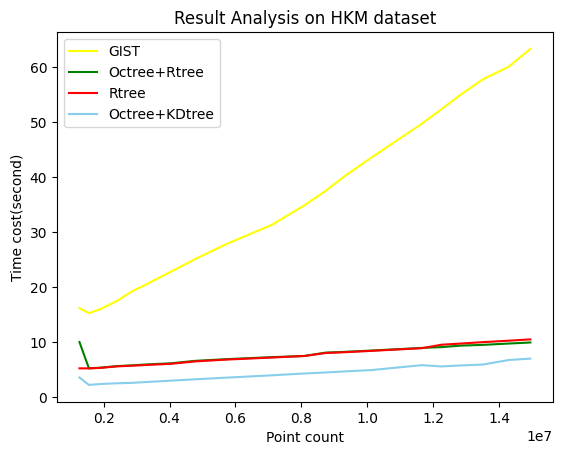

In [21]:
file_path = "/export/project/hjingaa/PointCloud_Octree/gist_result/Result_hkm.txt"
the_first = 1
time_list_gist = []
count_list_gist = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_gist.append(float(words[0]))
        the_last = float(words[0])
        count_list_gist.append(float(words[-2]))

file_path = "result_hkm/Result_OR.txt"
the_first = 1
time_list_or = []
count_list_or = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_or.append(float(words[0]))
        the_last = float(words[0])
        count_list_or.append(float(words[-2]))
time_list_or = [number / 1000000 for number in time_list_or]

file_path = "result_hkm/Result_R.txt"
the_first = 1
time_list_r = []
count_list_r = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_r.append(float(words[0]))
        the_last = float(words[0])
        count_list_r.append(float(words[-2]))
time_list_r = [number / 1000000 for number in time_list_r]

file_path = "result_hkm/Result_OK.txt"
the_first = 1
time_list_ok = []
count_list_ok = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_ok.append(float(words[0]))
        the_last = float(words[0])
        count_list_ok.append(float(words[-2]))
time_list_ok = [number / 1000000 for number in time_list_ok]


plt.title('Result Analysis on HKM dataset')

plt.plot(count_list_gist, time_list_gist, color='yellow', label='GIST')
plt.plot(count_list_or, time_list_or, color='green', label='Octree+Rtree')
plt.plot(count_list_r, time_list_r, color='red', label='Rtree')
plt.plot(count_list_ok, time_list_ok,  color='skyblue', label='Octree+KDtree')
# plt.plot(count_list_or, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例


plt.xlabel('Point count')
plt.ylabel('Time cost(second)')
plt.show()
        

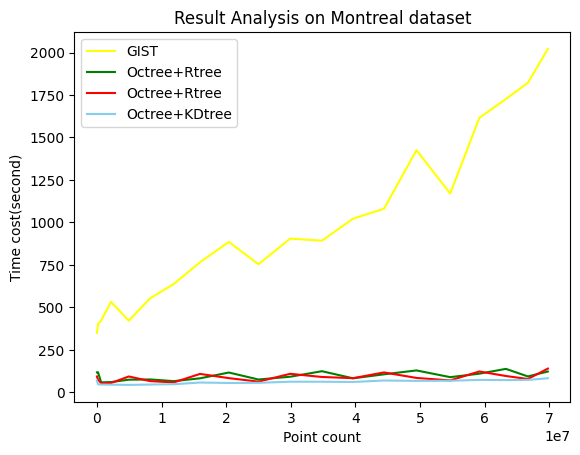

In [22]:
file_path = "/export/project/hjingaa/PointCloud_Octree/gist_result/Result_montreal.txt"
the_first = 1
time_list_gist = []
count_list_gist = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_gist.append(float(words[0]))
        the_last = float(words[0])
        count_list_gist.append(float(words[-2]))

file_path = "result_montreal/Result_OR.txt"
the_first = 1
time_list_or = []
count_list_or = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_or.append(float(words[0]))
        the_last = float(words[0])
        count_list_or.append(float(words[-2]))
time_list_or = [number / 1000000 for number in time_list_or]

file_path = "result_montreal/Result_R.txt"
the_first = 1
time_list_r = []
count_list_r = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_r.append(float(words[0]))
        the_last = float(words[0])
        count_list_r.append(float(words[-2]))
time_list_r = [number / 1000000 for number in time_list_r]

file_path = "result_montreal/Result_OK.txt"
the_first = 1
time_list_ok = []
count_list_ok = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_ok.append(float(words[0]))
        the_last = float(words[0])
        count_list_ok.append(float(words[-2]))
time_list_ok = [number / 1000000 for number in time_list_ok]


plt.title('Result Analysis on Montreal dataset')

plt.plot(count_list_gist, time_list_gist, color='yellow', label='GIST')
plt.plot(count_list_or, time_list_or, color='green', label='Octree+Rtree')
plt.plot(count_list_or, time_list_r, color='red', label='Octree+Rtree')
plt.plot(count_list_or, time_list_ok,  color='skyblue', label='Octree+KDtree')
# plt.plot(count_list_or, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例


plt.xlabel('Point count')
plt.ylabel('Time cost(second)')
plt.show()

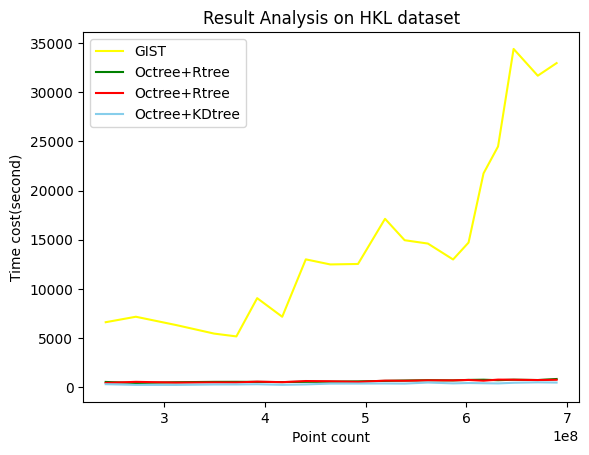

In [23]:
file_path = "/export/project/hjingaa/PointCloud_Octree/gist_result/Result_hkl.txt"
the_first = 1
time_list_gist = []
count_list_gist = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_gist.append(float(words[0]))
        the_last = float(words[0])
        count_list_gist.append(float(words[-2]))

file_path = "result_hkl/Result_OR.txt"
the_first = 1
time_list_or = []
count_list_or = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_or.append(float(words[0]))
        the_last = float(words[0])
        count_list_or.append(float(words[-2]))
time_list_or = [number / 1000000 for number in time_list_or]

file_path = "result_hkl/Result_R.txt"
the_first = 1
time_list_r = []
count_list_r = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_r.append(float(words[0]))
        the_last = float(words[0])
        count_list_r.append(float(words[-2]))
time_list_r = [number / 1000000 for number in time_list_r]

file_path = "result_hkl/Result_OK.txt"
the_first = 1
time_list_ok = []
count_list_ok = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_ok.append(float(words[0]))
        the_last = float(words[0])
        count_list_ok.append(float(words[-2]))
time_list_ok = [number / 1000000 for number in time_list_ok]


plt.title('Result Analysis on HKL dataset')

plt.plot(count_list_gist, time_list_gist, color='yellow', label='GIST')
plt.plot(count_list_or, time_list_or, color='green', label='Octree+Rtree')
plt.plot(count_list_or, time_list_r, color='red', label='Octree+Rtree')
plt.plot(count_list_or, time_list_ok,  color='skyblue', label='Octree+KDtree')
# plt.plot(count_list_or, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例


plt.xlabel('Point count')
plt.ylabel('Time cost(second)')
plt.show()